In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 평균값을 이용하여 데이터를 완만하게 만드는 함수
# data_index : 데이터 index중 완만하게 할 데이터의 index 값, 기본값 = 1
# window_size : 평균치를 낼때 확인하는 데이터의 범위, 기본값 = 10000

def getSmoothData(data, data_index = 1, window_size = 10000):
    out = []
    end_size = len(data)
    
    sum = 0
    for i in range(0, window_size):
        sum += abs(data[data_index][i])
    sum /= window_size
    
    for i in tqdm(range(window_size, end_size)):    
        sum *= window_size
        sum += abs(data[data_index][i])
        sum -= abs(data[data_index][i - window_size])
        sum /= window_size

        out.append(sum)
        
    return out

In [22]:
# 데이터를 분리할 구분자를 만드는 함수
# threshold 값보다 작은값 마다 구분자를 제작함
# threshold 기본값 0.75

def getSeparators(data, threshold = 0.75):
    mids = []
    start = 0
    end = 0
    end_size = len(data)

    for i in tqdm(range(0, end_size)):
        value = data[i]
        
        if (value < threshold):
            if (start == 0):
                start = i
            end = i
        elif (value > threshold):
            if (start != 0):
                mid = (int)((start + end) / 2)
                mids.append(mid)
                start = 0

    return mids

In [23]:
# 구분자의 중목을 제거하는 함수
# window 보다 작은 기간 내에 존재하는 구분자의 중복을 제거함
# window 의 기본값 10000

def deduplication(datas, window = 10000):
    pre = datas[0]
    
    for data in datas[1:]:
        if (data - pre < window):
            datas.remove(data) 
        else:
            pre = data
            
    return datas

In [24]:
# 데이터를 구분자를 이용해서 분할하는 함수

def split(datas, separators):
    idx_pre = 0
    idx_now = 0
    out = []
    
    for data in separators:
        idx_now = data
        out.append(datas[idx_pre:idx_now])
        idx_pre = idx_now
        
    return out

In [6]:
vibrations = pd.read_csv('03_10/VIB_0310_motor_51200.csv', encoding = 'cp949', delimiter = '\t', header = None)

100%|█████████████████████████████████████████████████████████| 490000/490000 [00:00<00:00, 2090864.47it/s]


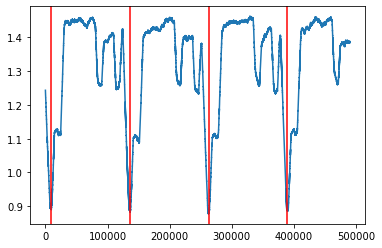

0번 사이클


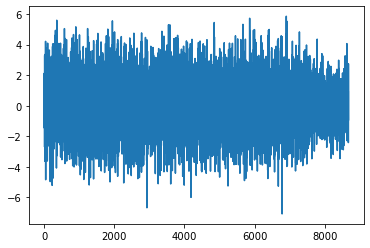

1번 사이클


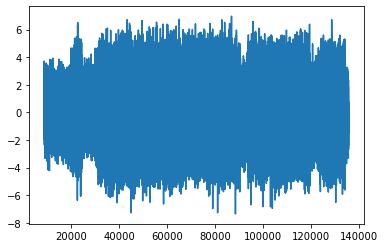

2번 사이클


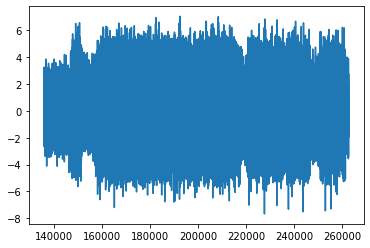

3번 사이클


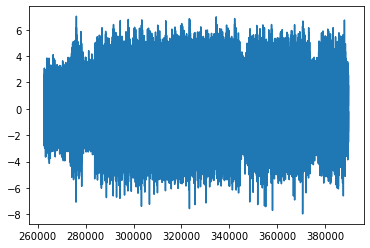

In [25]:
# 속도를 위해 사이즈 지정하여 일부만 출력
size = 500000

smoothed = getSmoothData(vibrations[:size])
separators = getSeparators(smoothed,threshold=0.9)
separators = deduplication(separators)
splited = split(vibrations[1], separators)

# 데이터와 구분자 출력
plt.plot(smoothed)
for data in separators:
    plt.axvline(x=data, ymin=0, ymax=1, color = 'red')
plt.show()

# 분할된 데이터 출력
idx = 0
for data in splited:
    print(str(idx) + "번 사이클")
    idx += 1
    plt.plot(data)
    plt.show()